In [158]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Training the model

The training model will have to split the dataset into training and test data. 

The training data will be used to estimate the weights, the test data will then be used to determine the loss function. In which it will also use the prediction function.

https://stackoverflow.com/questions/66079043/split-dataset-without-using-scikit-learn-train-test-split

https://medium.com/geekculture/linear-regression-from-scratch-in-python-without-scikit-learn-a06efe5dedb6

https://www.geeksforgeeks.org/how-to-implement-a-gradient-descent-in-python-to-find-a-local-minimum/ 

In [159]:
def train_model(X, y, alpha, max_epoch):
    """ Pass four arguments
        Arguments:
            X: input features
            y: responses
            alpha: learning rate
            max_epoch: maximum epochs
        Returns:
            w: estimated weights
            hist_loss: training loss history
    """
    hist_loss = []
    # Initialize weights with random values
    current_weight = np.array(np.random.randint(0, 9, np.shape(X)[1]))

    # We calculate the loss function for the first randomly initialized weights, and store it
    y_pred = prediction(current_weight, X)
    current_loss = loss_fn(y, y_pred)
    n = len(y)

    for i in range(max_epoch):
        # Estimate the parameter using the randomly initialized weights and loss function for it
        gradient = -(np.matmul((y-y_pred), X))/n
        current_weight = current_weight - alpha * gradient

        # Predict with the new weights, and calculate the loss function for it, and store it
        y_pred = prediction(current_weight, X)
        current_loss = loss_fn(y, y_pred)
        hist_loss.append(loss_fn(y, y_pred))

    return current_weight, hist_loss



### Helper Functions


In [160]:
# Helper function to split dataset into 8:2 training to testing dataset ratio
def split_dataset(X, y):
    # i will be the number of training datas
    i = int((1 - 0.2) * X.shape[0])

    # Generates random numbers based on the numbers of data
    o = np.random.permutation(X.shape[0])

    """ The following lines will basically rearrange the whole X and y dataset based on the randomized order
        Then, we will split it based on the number of training size
    """
    X_train, X_test = np.split(np.take(X, o, axis=0), [i])
    y_train, y_test = np.split(np.take(y, o), [i])
    return X_train, X_test, y_train, y_test

### Prediction of the model

This prediction will return the predicted values of a model

In [161]:
def prediction(w, X):
    """ Pass two arguments
        Arguments:
            w: weights
            X: input features
        Returns:
            yhat: predicted values
    """
    yhat = np.matmul(X, w)
    return yhat

### Loss function of the model

This loss function will only return the loss of a model

In [162]:
def loss_fn(y, yhat):
    """ Pass two arguments
        Arguments:
            y: responses
            yhat: predicted value
        Returns:
            loss: loss value
    """
    n = len(y)
    loss = (sum((y - yhat)**2)) / (2 * n)
    return loss
    

### Main function

In [163]:
if __name__ == "__main__":
    # Read data from csv file
    data = pd.read_csv("assignment1_dataset.csv", sep=",")
    data = data[["f1", "f2", "f3", "f4", "f5", "response"]]
    predict = "response"

    
    x = data.drop([predict], 1).values
    y = data[predict]
    epochs = 100

    X_train, X_test, y_train, y_test = split_dataset(x, y)
    weights, hist_loss = train_model(X_train, y_train, 0.1, epochs)
    print(hist_loss)
    print("\nEstimated weights: " + str(weights))

    prediction = prediction(weights, X_test)
    loss = loss_fn(y_test, prediction)
    print("The loss of the current model: " + str(loss))

    # testing purposes

    # X_train, X_test, y_train, y_test = split_dataset(x, y)
    # # Initialize weights with zero with the amount of columns I have
    # w = np.array(np.random.randint(0, 9, x.columns.shape))

    # new_header = X_test.iloc[0] #grab the first row for the header
    # new_X_test = X_test[1:] #take the data less the header row
    # new_X_test.columns = new_header #set the header row as the df header

    # print(sum(w * new_X_test))
    # print(X_test)


    # We calculate the loss function for the first randomly initialized weights, and store it
    # current_loss = loss_fn(y_test, prediction(w, X_test))

    # w, hist_loss = train_model(x, y, 0.2, 100)

[533.3065122387858, 437.17367888506413, 360.5356039067252, 299.42985044194944, 250.70109036812937, 211.83638069654336, 180.8341194446207, 156.09978342713498, 136.36296517292766, 120.61135035319012, 108.03817046106029, 98.00037546644485, 89.98533547269763, 83.5843289556887, 78.47143174594446, 74.38670440631142, 71.12280106359043, 68.51430199183837, 66.42921478749085, 64.7622023469111, 63.42918603501735, 62.36304417145896, 61.51018303539746, 60.82780300351958, 60.28171857504081, 59.844619799529326, 59.494685516953474, 59.214477044020775, 58.99005545057973, 58.810277123310705, 58.66623151462608, 58.55079230270306, 58.45825902581689, 58.38407090452876, 58.32457827063212, 58.27685997453321, 58.238577496130894, 58.20785836018824, 58.18320295277013, 58.16341002781622, 58.14751714393058, 58.134753029981304, 58.12449948319827, 58.1162608862393, 58.10963981493079, 58.104317515875344, 58.10003827854254, 58.09659692242338, 58.09382877629709, 58.09160165162545, 58.08980941191739, 58.08836681965687,

In [164]:
len(hist_loss)

100

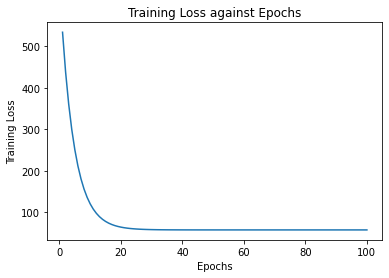

In [165]:
x = np.linspace(1, epochs, epochs)
plt.title("Training Loss against Epochs")
plt.xlabel("Epochs")
plt.ylabel("Training Loss")
plt.plot(x, hist_loss)
plt.show()